In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd

# Chemin du dossier contenant les fichiers XLSX
dossier_xlsx = '/home/patea/code/Pateaanania/poipoi/gttl'

# Liste pour stocker les DataFrames
liste_dataframes = []

# Boucle sur tous les fichiers du dossier
for fichier in os.listdir(dossier_xlsx):
    if fichier.endswith('.xlsx'):
        chemin_fichier = os.path.join(dossier_xlsx, fichier)
        df = pd.read_excel(chemin_fichier)
        # Forcer la conversion des colonnes
        df['Matricule'] = df['Matricule'].astype(str)
        liste_dataframes.append(df)

# Concaténation de tous les DataFrames
df_concatene = pd.concat(liste_dataframes, ignore_index=True)

# Convertir les colonnes 'Début' et 'Fin' en chaînes de caractères (optionnel si on veut les conserver comme des timestamps)
df_concatene['Début'] = pd.to_datetime(df_concatene['Début'])
df_concatene['Fin'] = pd.to_datetime(df_concatene['Fin'])

# Grouper par 'Salarié', 'Matricule', 'Date', 'Qualification' et combiner les plages horaires
df_grouped = df_concatene.groupby(['Salarié', 'Matricule', 'Date', 'Qualification']).agg({
    'Début': 'min',  # Prend le début le plus tôt
    'Fin': 'max',    # Prend la fin la plus tardive
    'Durée': 'sum',  # Somme des durées si nécessaire
    'Code': 'first',  # Garde la première occurrence de 'Code'
    'Intitulé': 'first',  # Garde la première occurrence de 'Intitulé'
    'Quantité': 'sum',  # Somme des quantités si cela fait sens
    'Plan': 'first',  # Garde la première occurrence de 'Plan'
    'Description': 'first',  # Garde la première occurrence de 'Description'
    # Ajoute d'autres colonnes si nécessaire...
}).reset_index()

# Convertir les colonnes 'Début' et 'Fin' en chaînes de caractères si nécessaire pour l'enregistrement en Parquet
df_grouped['Début'] = df_grouped['Début'].astype(str)
df_grouped['Fin'] = df_grouped['Fin'].astype(str)

# Affichage du DataFrame groupé (optionnel)
print(df_grouped.head())

# Enregistrer le résultat dans un fichier Parquet
df_grouped.to_parquet('/home/patea/code/Pateaanania/poipoi/gtt/gtt212223.parquet', index=False)


ValueError: No objects to concatenate

In [5]:
# Si tu es certain que les dates sont en format DD/MM/YYYY :
df_grouped['Année'] = pd.to_datetime(df_grouped['Date'], format='%d/%m/%Y').dt.year

# OU, si tu veux laisser pandas inférer le format des dates :
# df_grouped['Année'] = pd.to_datetime(df_grouped['Date'], infer_datetime_format=True).dt.year

In [6]:
# Comptage des occurrences par année et par intitulé
occurrences_par_annee = df_grouped.groupby(['Année', 'Intitulé']).size().unstack().fillna(0)
print(occurrences_par_annee)


Intitulé  ABS MANDAT MUNICIPAL (Article L2123-1)  ABS SYNDICALES FORMATION  \
Année                                                                        
2020                                         0.0                      31.0   
2021                                         1.0                      62.0   
2022                                         0.0                      42.0   

Intitulé  ABSENCE A JUSTIFIER  ACCIDENT DU TRAVAIL  ADMINISTRATIF  ADOPTION  \
Année                                                                         
2020                     58.0                910.0            0.0       3.0   
2021                    248.0                633.0           38.0       0.0   
2022                    140.0                925.0            0.0       3.0   

Intitulé  AEA - COVID  ALLAITEMENT  ANCIENNETE   ANNUEL  ...  MARIAGE  \
Année                                                    ...            
2020              6.0        418.0      1087.0  27145.0  ...     68

In [7]:
# Comptage des occurrences par année et par intitulé
occurrences_par_annee = df_grouped.groupby(['Année', 'Intitulé']).size().unstack().fillna(0)
print(occurrences_par_annee)


Intitulé  ABS MANDAT MUNICIPAL (Article L2123-1)  ABS SYNDICALES FORMATION  \
Année                                                                        
2020                                         0.0                      31.0   
2021                                         1.0                      62.0   
2022                                         0.0                      42.0   

Intitulé  ABSENCE A JUSTIFIER  ACCIDENT DU TRAVAIL  ADMINISTRATIF  ADOPTION  \
Année                                                                         
2020                     58.0                910.0            0.0       3.0   
2021                    248.0                633.0           38.0       0.0   
2022                    140.0                925.0            0.0       3.0   

Intitulé  AEA - COVID  ALLAITEMENT  ANCIENNETE   ANNUEL  ...  MARIAGE  \
Année                                                    ...            
2020              6.0        418.0      1087.0  27145.0  ...     68

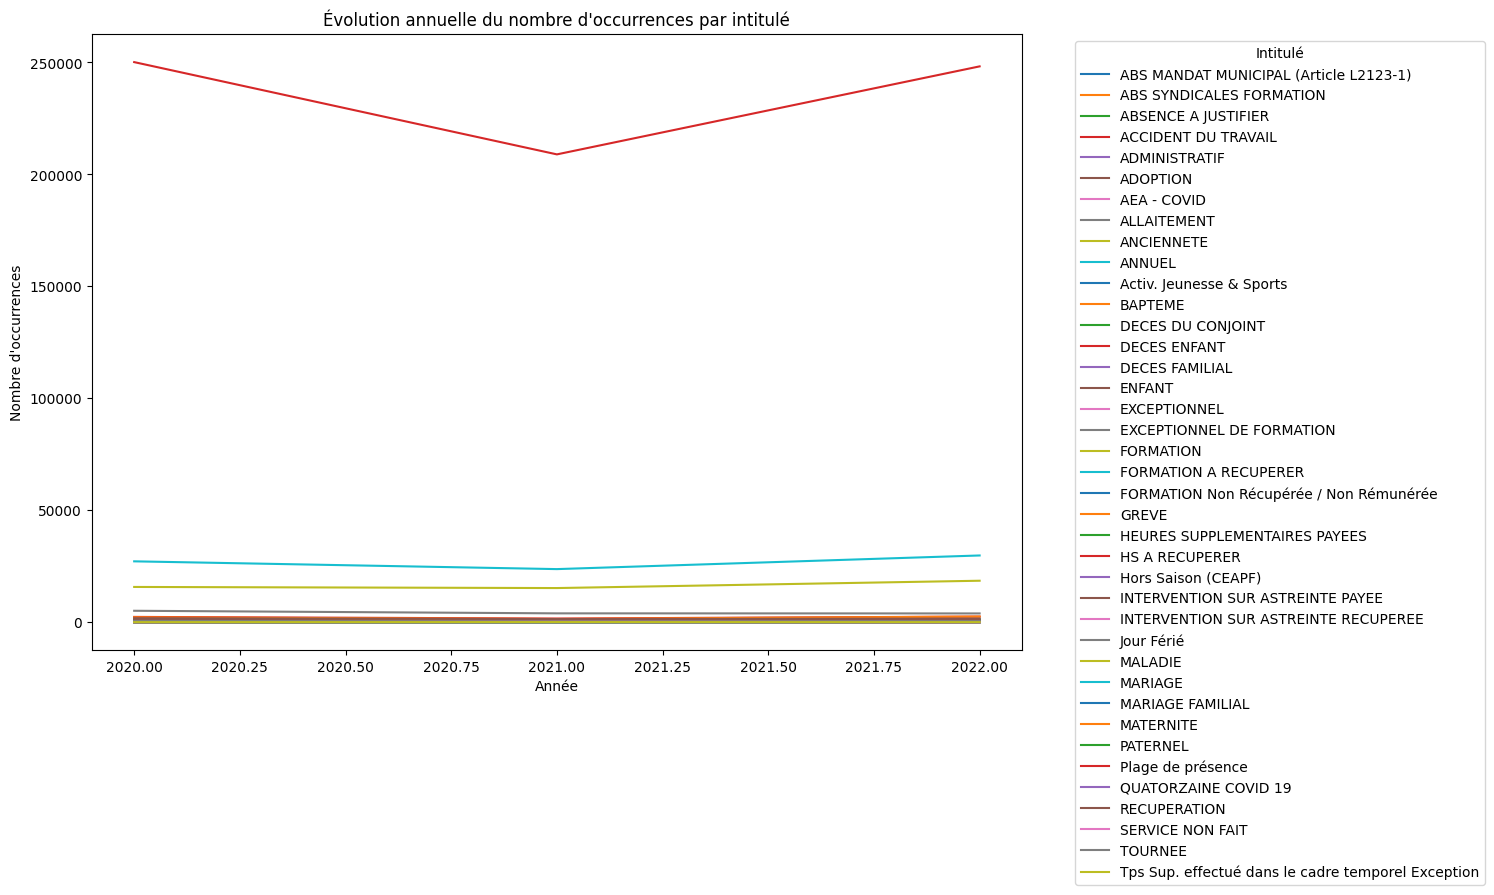

In [8]:
import matplotlib.pyplot as plt

# Tracer l'évolution des occurrences
occurrences_par_annee.plot(kind='line', figsize=(12, 8))
plt.title("Évolution annuelle du nombre d'occurrences par intitulé")
plt.xlabel("Année")
plt.ylabel("Nombre d'occurrences")
plt.legend(title='Intitulé', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


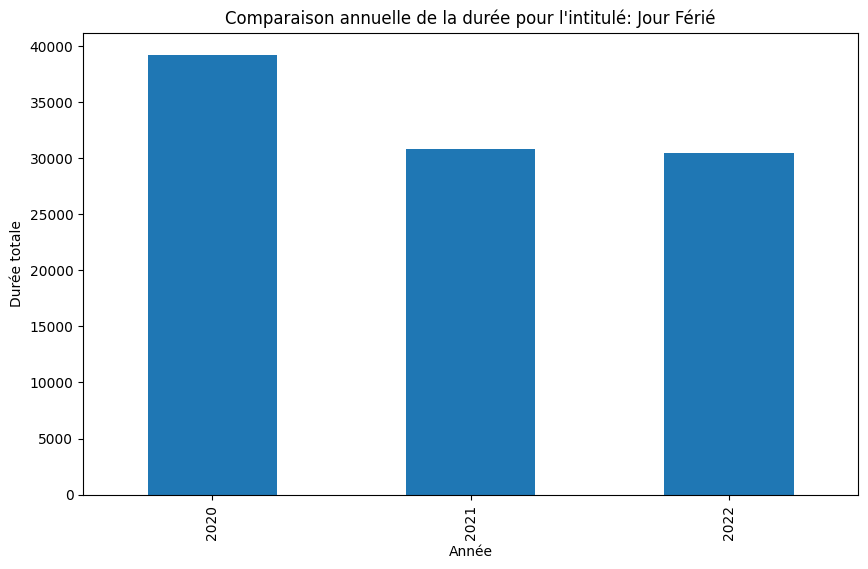

In [9]:
# Sélectionner un intitulé spécifique pour l'analyse (par exemple 'Jour Férié')
intitule_specifique = 'Jour Férié'
comparaison_par_annee = df_grouped[df_grouped['Intitulé'] == intitule_specifique].groupby('Année')['Durée'].sum()

# Tracer la comparaison
comparaison_par_annee.plot(kind='bar', figsize=(10, 6))
plt.title(f"Comparaison annuelle de la durée pour l'intitulé: {intitule_specifique}")
plt.xlabel("Année")
plt.ylabel("Durée totale")
plt.show()


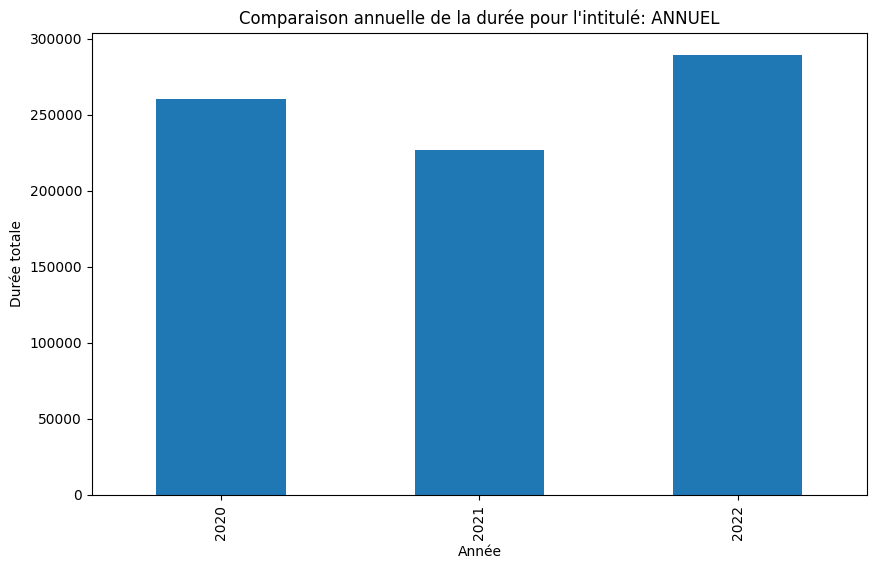

In [10]:
# Sélectionner un intitulé spécifique pour l'analyse (par exemple 'Jour Férié')
intitule_specifique = 'ANNUEL'
comparaison_par_annee = df_grouped[df_grouped['Intitulé'] == intitule_specifique].groupby('Année')['Durée'].sum()

# Tracer la comparaison
comparaison_par_annee.plot(kind='bar', figsize=(10, 6))
plt.title(f"Comparaison annuelle de la durée pour l'intitulé: {intitule_specifique}")
plt.xlabel("Année")
plt.ylabel("Durée totale")
plt.show()


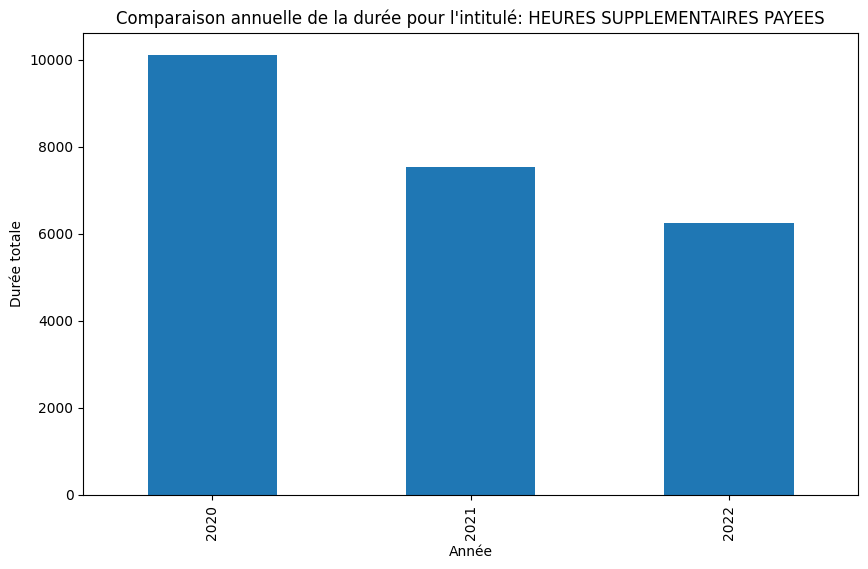

In [11]:
# Sélectionner un intitulé spécifique pour l'analyse (par exemple 'Jour Férié')
intitule_specifique = 'HEURES SUPPLEMENTAIRES PAYEES'
comparaison_par_annee = df_grouped[df_grouped['Intitulé'] == intitule_specifique].groupby('Année')['Durée'].sum()

# Tracer la comparaison
comparaison_par_annee.plot(kind='bar', figsize=(10, 6))
plt.title(f"Comparaison annuelle de la durée pour l'intitulé: {intitule_specifique}")
plt.xlabel("Année")
plt.ylabel("Durée totale")
plt.show()


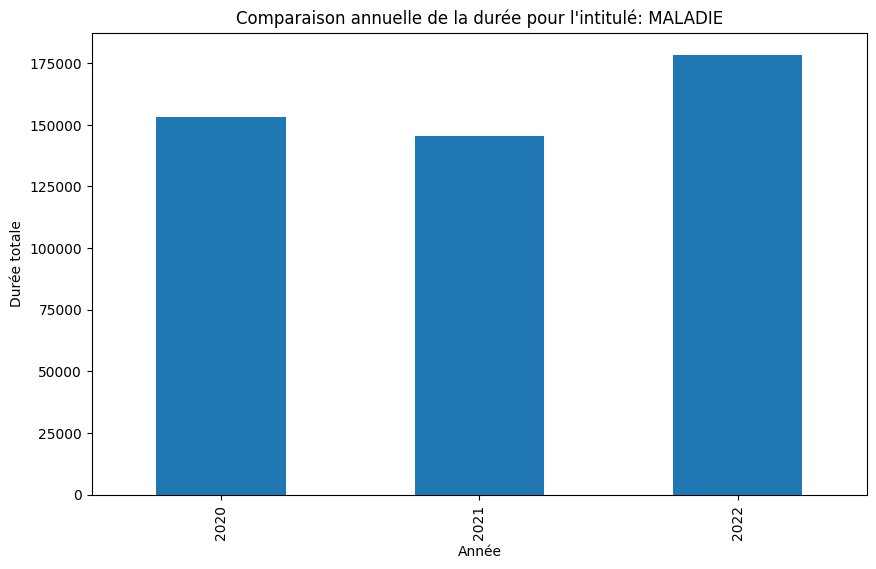

In [12]:
# Sélectionner un intitulé spécifique pour l'analyse (par exemple 'Jour Férié')
intitule_specifique = 'MALADIE'
comparaison_par_annee = df_grouped[df_grouped['Intitulé'] == intitule_specifique].groupby('Année')['Durée'].sum()

# Tracer la comparaison
comparaison_par_annee.plot(kind='bar', figsize=(10, 6))
plt.title(f"Comparaison annuelle de la durée pour l'intitulé: {intitule_specifique}")
plt.xlabel("Année")
plt.ylabel("Durée totale")
plt.show()


In [13]:
df_grouped['Année'] = pd.to_datetime(df_grouped['Date'], format='%d/%m/%Y').dt.year


In [14]:
# Calculer le nombre de professionnels uniques par année
nombre_professionnels_par_annee = df_grouped.groupby('Année')['Matricule'].nunique()

# Afficher le résultat
print(nombre_professionnels_par_annee)


Année
2020    1854
2021    2023
2022    1834
Name: Matricule, dtype: int64


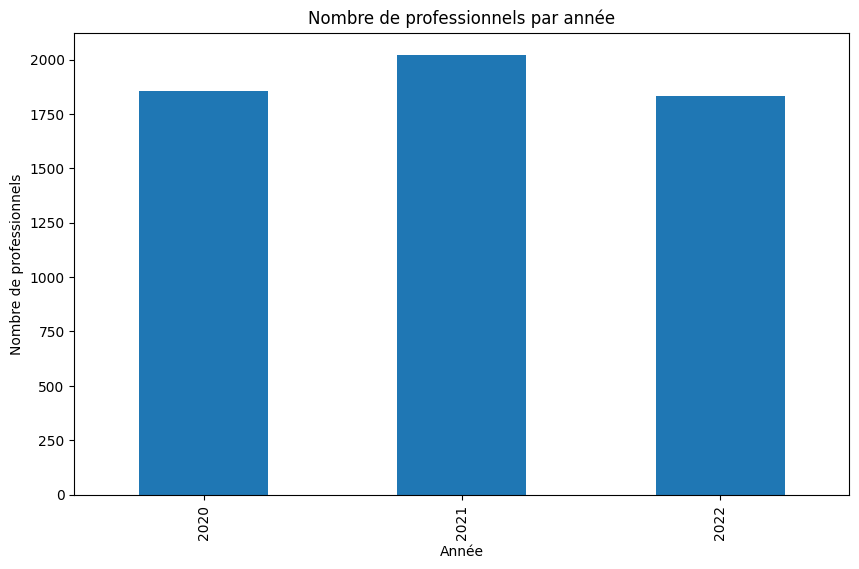

In [15]:
import matplotlib.pyplot as plt

# Tracer le nombre de professionnels par année
nombre_professionnels_par_annee.plot(kind='bar', figsize=(10, 6))
plt.title("Nombre de professionnels par année")
plt.xlabel("Année")
plt.ylabel("Nombre de professionnels")
plt.show()


In [16]:
df_grouped['Mois'] = pd.to_datetime(df_grouped['Date'], format='%d/%m/%Y').dt.to_period('M')


In [34]:
absences = df_grouped[df_grouped['Intitulé'].isin(['ANNUEL' 'MATERNITE' 'MALADIE' 'EXCEPTIONNEL''HS A RECUPERER''HS A RECUPERER' 'FORMATION' 'Jour Férié' 'RECUPERATION'
 'HEURES SUPPLEMENTAIRES PAYEES' 'DECES FAMILIAL' 'ENFANT''FORMATION A RECUPERER' 'ANCIENNETE' 'QUATORZAINE COVID 19' 'INTERVENTION SUR ASTREINTE RECUPEREE' 'INTERVENTION SUR ASTREINTE PAYEE'
 'MARIAGE FAMILIAL' 'ACCIDENT DU TRAVAIL' 'PATERNEL'
 'GREVE' 'MARIAGE' 'ABSENCE A JUSTIFIER' 'TOURNEE' 'Activ. Jeunesse & Sports''Tps Sup. effectué dans le cadre temporel Exception'
 'Hors Saison (CEAPF)' 'ABS SYNDICALES FORMATION' 'ALLAITEMENT'
 'ABS MANDAT MUNICIPAL (Article L2123-1)' 'DECES DU CONJOINT'
 'AEA - COVID' 'BAPTEME' 'ADOPTION' 'DECES ENFANT' 'ADMINISTRATIF'])]  # Modifie les intitulés en fonction de tes données


In [35]:
absences_par_mois = absences.groupby(['Mois', 'Qualification'])['Durée'].sum().unstack().fillna(0)


In [36]:
# Estimation du nombre total de jours travaillés par mois et par catégorie professionnelle
jours_travailles_par_mois = df_grouped.groupby(['Mois', 'Qualification'])['Durée'].count().unstack().fillna(0) * 20  # Supposons 20 jours ouvrables par mois


In [37]:
# Calcul du taux d'absentéisme
taux_absenteisme = (absences_par_mois / jours_travailles_par_mois) * 100


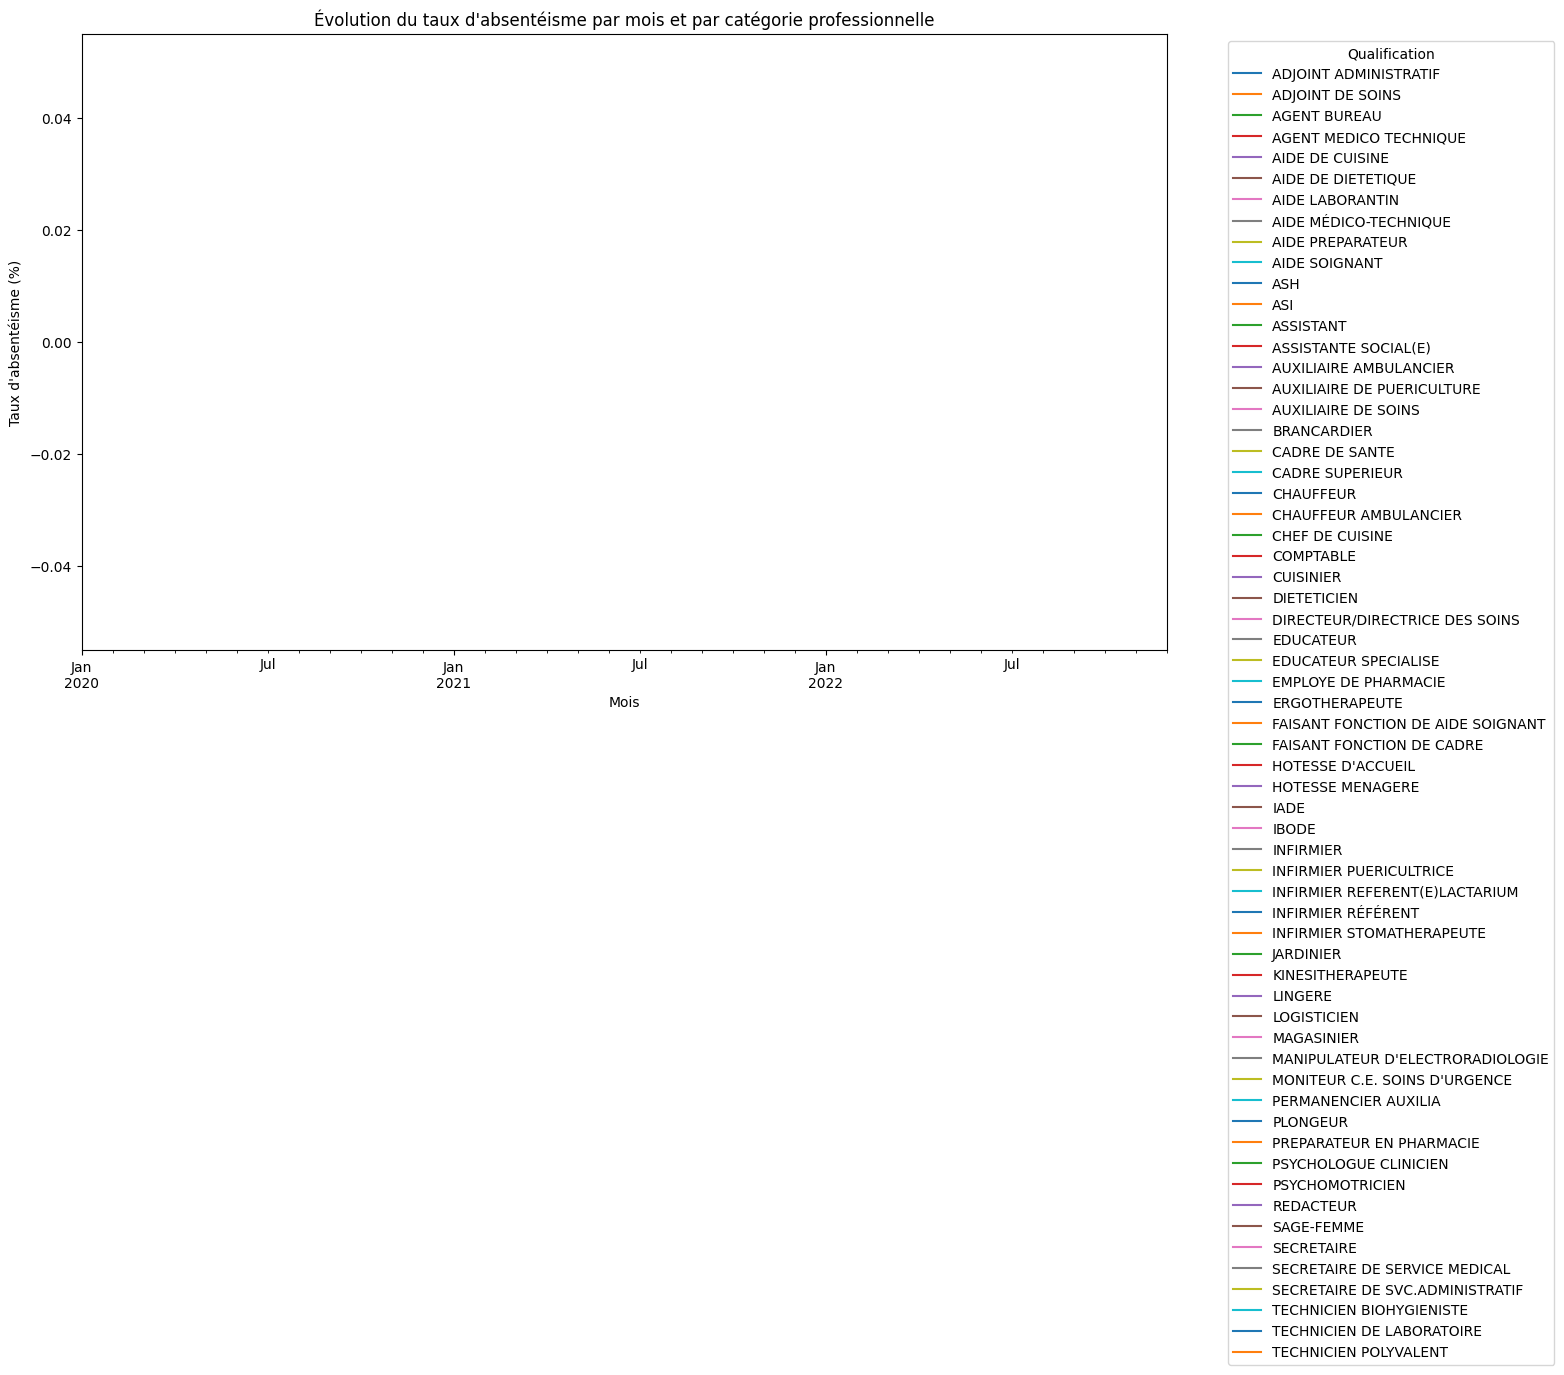

In [38]:
taux_absenteisme.plot(kind='line', figsize=(14, 8))
plt.title("Évolution du taux d'absentéisme par mois et par catégorie professionnelle")
plt.xlabel("Mois")
plt.ylabel("Taux d'absentéisme (%)")
plt.legend(title='Qualification', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [25]:
#Explications supplémentaires
#absences.groupby(['Mois', 'Qualification'])['Durée'].sum() : Cette ligne agrège le total des jours d'absence pour chaque mois et chaque catégorie professionnelle.
#jours_travailles_par_mois : Une estimation du nombre total de jours travaillés basée sur une hypothèse de 20 jours ouvrables par mois.
#Visualisation avec matplotlib et seaborn : Le graphique montre l'évolution mensuelle du taux d'absentéisme, avec une courbe de tendance linéaire pour visualiser les tendances globales.

In [26]:
# Filtrer les données pour les infirmiers
df_infirmiers = df_grouped[df_grouped['Qualification'] == 'Infirmier']


In [28]:
absences_infirmiers = df_infirmiers[df_infirmiers['Intitulé'].isin(['Jour Férié', 'Congé Maladie', 'Congé'])]

absences_par_mois_infirmiers = absences_infirmiers.groupby('Mois')['Durée'].sum()


In [29]:
jours_travailles_par_mois_infirmiers = df_infirmiers.groupby('Mois')['Durée'].count() * 20  # Supposons 20 jours ouvrables par mois


In [30]:
taux_absenteisme_infirmiers = (absences_par_mois_infirmiers / jours_travailles_par_mois_infirmiers) * 100


In [32]:
print(taux_absenteisme_infirmiers)


Series([], Freq: M, Name: Durée, dtype: float64)


In [33]:
print(df_grouped['Qualification'].unique())
print(df_grouped['Intitulé'].unique())


['AIDE SOIGNANT' 'ASH' 'FAISANT FONCTION DE AIDE SOIGNANT' 'INFIRMIER'
 'SECRETAIRE DE SERVICE MEDICAL' 'AIDE DE CUISINE' 'BRANCARDIER'
 'PREPARATEUR EN PHARMACIE' 'CHAUFFEUR AMBULANCIER' 'ERGOTHERAPEUTE'
 'AUXILIAIRE DE SOINS' 'CUISINIER' 'SECRETAIRE DE SVC.ADMINISTRATIF'
 'COMPTABLE' 'SAGE-FEMME' "MANIPULATEUR D'ELECTRORADIOLOGIE"
 'EMPLOYE DE PHARMACIE' 'CADRE DE SANTE' 'DIRECTEUR/DIRECTRICE DES SOINS'
 'AGENT BUREAU' 'REDACTEUR' 'AIDE MÉDICO-TECHNIQUE' 'IADE'
 'HOTESSE MENAGERE' 'DIETETICIEN' 'FAISANT FONCTION DE CADRE'
 'TECHNICIEN DE LABORATOIRE' 'KINESITHERAPEUTE' 'IBODE'
 'AUXILIAIRE DE PUERICULTURE' 'INFIRMIER RÉFÉRENT' 'PSYCHOMOTRICIEN'
 'PSYCHOLOGUE CLINICIEN' 'PERMANENCIER AUXILIA'
 'INFIRMIER STOMATHERAPEUTE' 'INFIRMIER PUERICULTRICE'
 "MONITEUR C.E. SOINS D'URGENCE" 'AIDE LABORANTIN' 'CADRE SUPERIEUR'
 'AGENT MEDICO TECHNIQUE' 'TECHNICIEN BIOHYGIENISTE' 'PLONGEUR'
 'SECRETAIRE' 'ADJOINT DE SOINS' 'AIDE DE DIETETIQUE'
 'ADJOINT ADMINISTRATIF' 'MAGASINIER' 'EDUCATEUR SPECIA